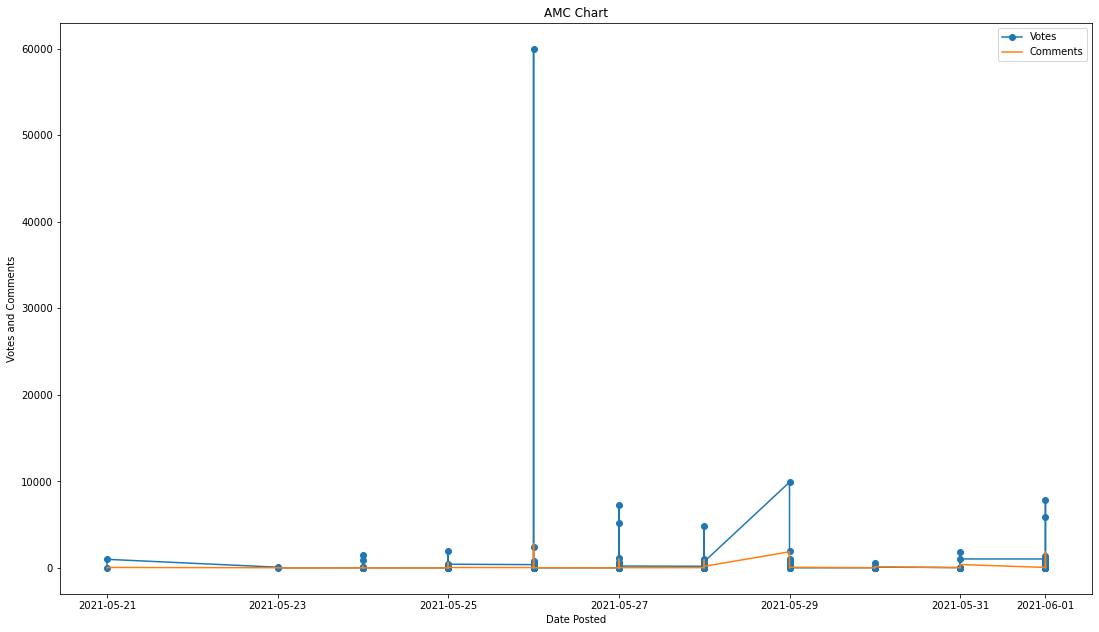

In [28]:
import mysql.connector
from matplotlib import pyplot as plt

# returns connection object #
def connect_to_db(db_name):
    cnx = mysql.connector.connect(
    user='root',
    password='chalkHorseMountain',
    host='localhost',
    database=db_name
    )
    return cnx

# returns boolean #
def table_exists(cursor, tbl_name):
    cursor.execute("""
        SELECT COUNT(*)
        FROM information_schema.tables
        WHERE table_schema = DATABASE()
        AND table_name = \"""" + tbl_name + """\";
    """)
    
    if cursor.fetchone()[0] == 1:
        return True
    return False

class stock_hist(object):
    def __init__(self, symbol, votes, comments, dates):
        self.symbol = symbol
        self.votes = votes
        self.comments = comments
        self.dates = dates

def get_hist(symbol, date_range):
    
    cnx = connect_to_db("TheSpatula")
    mycursor = cnx.cursor()
    assert mycursor
    assert table_exists(mycursor, "reddit")
    assert table_exists(mycursor, "youtube")
    
    mycursor.execute(f"""
        SELECT num_votes, num_comments, date_posted
        FROM reddit
        WHERE symbol="{symbol}"
        AND date_posted > "{date_range[0]}"
        AND date_posted < "{date_range[1]}"
        ;
        """)
    
    votes = list()
    comments = list()
    dates = list()
    
    for (num_votes, num_comments, date_posted) in mycursor:
        votes.append(num_votes)
        comments.append(num_comments)
        dates.append(date_posted)
    
    mycursor.close()
    cnx.close()
    
    return stock_hist(symbol, votes, comments, dates)


if __name__ == "__main__":
    date_range = ("2021-05-20", "2021-06-02")
    
    hist_obj = get_hist("AMC", date_range)
    
    x = hist_obj.dates
    y = hist_obj.votes
    z = hist_obj.comments
    
    plt.plot(x,y, linestyle='-', marker='o')
    plt.plot(x,z)
    plt.title("AMC Chart")
    plt.xlabel("Date Posted")
    plt.ylabel("Votes and Comments")
    plt.legend(["Votes", "Comments"])
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    